In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from keras.models import load_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
(X_train, _), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [8]:
denoise= load_model('auto-denoise.h5')
#load_model('auto-denoise.h5')

(28, 28)


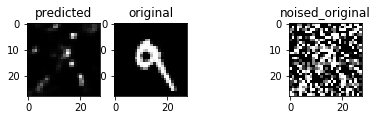

In [15]:
index = 7
original = X_test[index].astype("float32") / 255.
print(original.shape)
#original2 = y_test[index].astype("float32") / 255
#encoding = encoder.predict(np.array([original]))[0]
#encoding[0] = 0
#encoding[1] = -100
#print(encoding, y_test[index])

noise_factor = 1.0
noised_original = original + np.random.normal(loc=0.0, scale=noise_factor, size=original.shape)    
noised_original = np.clip(noised_original, 0., 1.)

plt.subplot(1,4,1)
plt.title("predicted")
plt.imshow(denoise.predict(np.array([noised_original]))[0], cmap='gray')
plt.subplot(1,4,2)
plt.title("original")
plt.imshow(original, cmap='gray')
#plt.subplot(1,4,3)
#plt.title("original2")
#plt.imshow(original2, cmap='gray')
plt.subplot(1,4,4)
plt.title("noised_original")
plt.imshow(noised_original, cmap='gray')